# MNIST Digit Classification Using ANN

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [23]:
# Load and Preprocess Data
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
# Normalize pixel values (0-255 -> 0-1)
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

## **Why Normalize?**
- The pixel values in the MNIST dataset range from 0 to 255, representing grayscale intensity.
- Normalizing these values scales them to the range [0, 1], which is essential for improving the model's performance.

### **Benefits of Normalization**
- **Stabilizing Training:** Prevents large gradients, making the training process more stable.
- **Faster Convergence:** Helps the model converge faster due to smaller and consistent input values.
- **Reducing Computational Complexity:** Lower values reduce computational load.

---

## **Mathematical Explanation**
If a pixel value is represented by $( p )$, the normalized value $( p_{\text{normalized}} )$ is computed as:

$
p_{\text{normalized}} = \frac{p}{255}
$

Where:
- $( p \in [0, 255] )$
- $( p_{\text{normalized}} \in [0, 1] )$

In [25]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

In [48]:
from tensorflow.keras.initializers import HeNormal

# Define the Model
model = Sequential([
    
    # Input Layer
    Input(shape=(28, 28)),
    Flatten(),  # Flatten the input

    # First Block
    Dense(1024, activation='relu', kernel_initializer=HeNormal()),
    BatchNormalization(),
    Dropout(0.4),

    # Second Block
    Dense(512, activation='relu', kernel_initializer=HeNormal()),
    BatchNormalization(),
    Dropout(0.4),

    # Third Block
    Dense(256, activation='relu', kernel_initializer=HeNormal()),
    BatchNormalization(),
    Dropout(0.3),

    # Fourth Block
    Dense(128, activation='relu', kernel_initializer=HeNormal()),
    BatchNormalization(),
    Dropout(0.3),

    # Fifth Block
    Dense(64, activation='relu', kernel_initializer=HeNormal()),
    BatchNormalization(),
    Dropout(0.2),

    # Output Layer
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

## **Detailed Explanation**

### **1. Input and Flatten Layer**
```python
Input(shape=(28, 28)),
Flatten()  # Flatten the input
```
- **Input Layer:** Defines the input shape as a 28x28 image from the MNIST dataset.
- **Flatten Layer:** Converts the 2D image into a 1D vector of 784 features.

$
\text{Flattened Shape} = 28 \times 28 = 784
$

---

### **2. Dense Layers with He Initialization**
```python
Dense(1024, activation='relu', kernel_initializer=HeNormal())
```
- **Dense Layer:** Fully connected layer with 1024 neurons.
- **Activation Function:** ReLU (Rectified Linear Unit), defined as:

$
f(x) = \max(0, x)
$

- **He Initialization:** Initializes weights using the He Normal strategy, calculated as:

$
W \sim \mathcal{N}(0, \sqrt{\frac{2}{\text{fan-in}}})
$

Where:
- $( W )$ is the weight.
- $( \text{fan-in} )$ is the number of input features to the layer.

---

### **3. Batch Normalization Layer**
```python
BatchNormalization()
```
- **Purpose:** Normalizes the output of the previous layer to have a mean of 0 and standard deviation of 1, stabilizing training.
  
$
\hat{x}_i = \frac{x_i - \mu}{\sigma}
$

Where:
- $( \mu )$: Mean of the batch.
- $( \sigma )$: Standard deviation of the batch.

---

### **4. Dropout Layer**
```python
Dropout(0.4)
```
- **Purpose:** Randomly disables 40% of neurons during training to prevent overfitting.

---

### **5. Output Layer**
```python
Dense(10, activation='softmax')
```
- **Dense Layer:** Final layer with 10 output classes (digits 0-9).
- **Activation Function:** Softmax, defined as:

$
\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{10} e^{z_j}}
$

Where:
- $( z_i )$ is the score for class $( i )$.
- The output represents the probability distribution across the 10 classes.

---

In [49]:
# Compile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## **Explanation of Each Component**

### **1. Optimizer: Adam**
```python
optimizer='adam'
```
- **Adam (Adaptive Moment Estimation):** A widely used optimizer that combines the benefits of:
  - **Momentum:** Helps accelerate learning by considering past gradients.
  - **RMSProp:** Adapts the learning rate for each parameter based on its updates.
  
#### **Mathematical Formulation**
The parameter update rule is:

$
\theta_t = \theta_{t-1} - \alpha \cdot \frac{m_t}{\sqrt{v_t} + \epsilon}
$

Where:
- $( \theta_t )$: Model parameters at time $( t )$
- $( \alpha )$: Learning rate
- $( m_t )$: Exponentially decayed average of past gradients (momentum)
- $( v_t )$: Exponentially decayed average of squared gradients (RMSProp)
- $( \epsilon )$: Small constant to avoid division by zero

---

### **2. Loss Function: Sparse Categorical Crossentropy**
```python
loss='sparse_categorical_crossentropy'
```
- **Why Use This?**
  - The target labels are integers (not one-hot encoded).
  - This loss function is suitable for multi-class classification tasks.

#### **Mathematical Definition**
The sparse categorical crossentropy is computed as:

$
L = - \sum_{i=1}^{N} y_i \log(\hat{y}_i)
$

Where:
- $( y_i )$: True label (as an integer)
- $( \hat{y}_i )$: Predicted probability from the softmax layer
- $( N )$: Number of samples

---

### **3. Evaluation Metric: Accuracy**
```python
metrics=['accuracy']
```
- **Purpose:** Measures the proportion of correctly classified samples.

#### **Mathematical Definition**
The accuracy is calculated as:

$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Samples}}
$

---

In [50]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,509,706 (5.76 MB)

 Trainable params: 1,505,738 (5.74 MB)

 Non-trainable params: 3,968 (15.50 KB)

# **Model Parameters Overview**

---

### **Total Parameters**
```text
Total params: 1,509,706 (5.76 MB)
```
- **Meaning:** This is the total number of parameters in the model, including:
  - **Weights:** Values connecting neurons between layers.
  - **Biases:** Additional learnable values added to neurons.
  
- **Why Important?**
  - More parameters increase the model’s capacity but also raise the risk of overfitting.

---

### **Trainable Parameters**
```text
Trainable params: 1,505,738 (5.74 MB)
```
- **Meaning:** These are the parameters updated during backpropagation:
  - **From Dense Layers:** Weights and biases learned through gradient descent.
  - **From Batch Normalization Layers:** Mean and variance parameters.

#### **Mathematical Insight**
For a fully connected (Dense) layer, the number of parameters is:

$
\text{Parameters} = (\text{Input Size} \times \text{Units}) + \text{Biases}
$

Example (First Dense Layer):
$
(784 \times 1024) + 1024 = 804,864
$

---

### **Non-Trainable Parameters**
```text
Non-trainable params: 3,968 (15.50 KB)
```
- **Meaning:** These are parameters that are not updated during training, including:
  - **Batch Normalization Statistics:** Running mean and variance used for inference after training.

#### **Reason:** 
- During inference, Batch Normalization uses fixed statistics rather than updating them.

---

### **Why These Values Matter**
- **Balance:** A large number of trainable parameters can improve model performance but increase computational cost and memory usage.
- **Efficiency:** Reducing non-trainable parameters helps optimize resource usage.

---

In [51]:
# Define Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5, verbose=1
)

## **1. EarlyStopping Callback**

### **What It Does**
- Monitors the **validation loss (`val_loss`)** during training.
- Stops training if there’s **no improvement for 5 consecutive epochs**.
- Restores the **best model weights** to avoid overfitting.

### **Why Use It?**
- **Avoid Overfitting:** Stops training when the validation loss stops decreasing.
- **Save Resources:** Reduces unnecessary computations.

---

### **Mathematical Insight**
If $( L_{\text{val}} )$ represents validation loss at epoch $( t )$, training stops if:

$
L_{\text{val}}(t) \geq \min \{ L_{\text{val}}(t - k) \} \quad \text{for } k = 1, 2, ..., \text{patience}
$

Where:
- **Patience:** Number of epochs to wait before stopping (5 in this case).

---

## **2. ReduceLROnPlateau Callback**

### **What It Does**
- Monitors **validation loss (`val_loss`)**.
- **Reduces learning rate** by a factor of 0.5 if validation loss does not improve for **3 consecutive epochs**.
- Ensures the learning rate **never falls below `1e-5`**.

### **Why Use It?**
- **Adaptive Learning:** Allows the model to learn better when the performance plateaus.
- **Prevents Stagnation:** Helps escape from local minima.

---

### **Mathematical Insight**
Let the learning rate at epoch $( t )$ be $( \alpha_t )$. If there’s no improvement in validation loss for **3 epochs**, the learning rate is updated as:


The learning rate update rule for the **ReduceLROnPlateau** callback is:

$
\alpha_{t+1} = \max(\alpha_t \times \text{factor}, \text{min\_lr})
$

---

### **Explanation:**
- $( \alpha_t )$: Current learning rate at epoch $( t )$
- $( \text{factor} )$: Reduction factor (set to 0.5)
- $( \text{min\_lr} )$: Minimum allowed learning rate (set to $( 1 \times 10^{-5} )$)

---

### **When This Rule Applies:**
- If the **validation loss** does not improve for a specified number of epochs (`patience=3`), the learning rate is reduced.
- The learning rate is updated by multiplying the current value $( \alpha_t )$ by the **reduction factor**.
- If the reduced learning rate falls below the **minimum learning rate**, it is capped at $( \text{min\_lr} )$.

---

### **Example Calculation:**
Suppose:
- Initial learning rate $( \alpha_0 = 0.001 )$
- Factor = 0.5
- Minimum learning rate $( \text{min\_lr} = 1 \times 10^{-5} )$

1. After the first reduction:

$
\alpha_1 = \max(0.001 \times 0.5, 1 \times 10^{-5}) = 0.0005
$

2. After another reduction:

$
\alpha_2 = \max(0.0005 \times 0.5, 1 \times 10^{-5}) = 0.00025
$

3. If this continues and falls below the minimum:

$
\alpha_n = \max(0.00001, 1 \times 10^{-5}) = 1 \times 10^{-5}
$

---

### **Why These Callbacks Matter**
- **Stability:** They make the model more stable during training.
- **Efficiency:** Prevent wasting resources by stopping early or reducing the learning rate when needed.

In [52]:
# Train the Model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,  # Higher epochs for better callback performance
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7482 - loss: 0.8013 - val_accuracy: 0.9544 - val_loss: 0.1533 - learning_rate: 0.0010
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9162 - loss: 0.2809 - val_accuracy: 0.9648 - val_loss: 0.1192 - learning_rate: 0.0010
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9343 - loss: 0.2205 - val_accuracy: 0.9697 - val_loss: 0.1058 - learning_rate: 0.0010
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9419 - loss: 0.1959 - val_accuracy: 0.9712 - val_loss: 0.0957 - learning_rate: 0.0010
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9507 - loss: 0.1698 - val_accuracy: 0.9728 - val_loss: 0.0924 - learning_rate: 0.0010
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9538 - loss: 0.1577 - val_accuracy: 0.9765 - val_loss: 0.0813 - learning_rate: 0.0010
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9599 - l

In [53]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9831 - loss: 0.0518
Test Accuracy: 0.9831


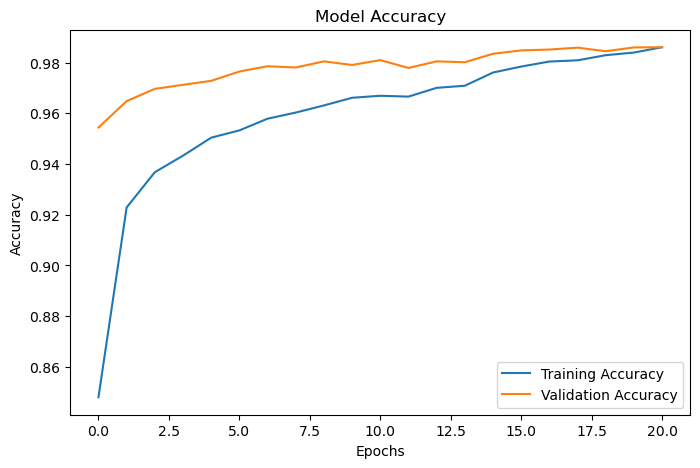

In [54]:
# Visualize Training History
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

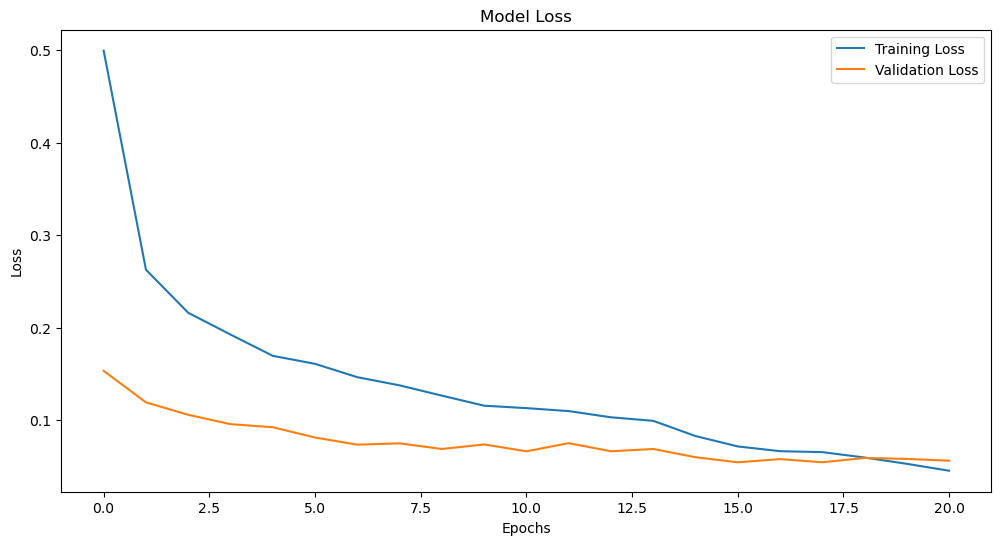

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()